## A cure?

By now you should be well versed in both the approximation-generalization trade off and the bias-variance trade off. You should know that as your model becomes more complex it requires more data. That being said if you already have a lot of data, then you can use a more expressive/complex model to get better performance. 

Now the question that you might be wanting to ask me is: well how do I know what is the right sized model?

You can use the rule of thumb, but as I said, it is just a rule of thumb. There will be exceptions. And what about if you have 25 data points. Do you use a model with 2.5 free parameters??

The answer to this is you use regularization.

## Regularization

Regularization is an easy way to control the size of your hypothesis. Let's say you have a data set that has 10 columns and 25 rows. This means a linear fit will look like:

$$y = w_0 + w_1 * x_1 + ... + w_{10} * x_{10}$$

We will have 11 free parameters for 25 data points. How do we reduce the number of parameters to meet the data? Do we just randomly drop 8 or 9 of the columns? That doesn't seem right...

Regularization will constrain the hypothesis space and let the model decide which parameters are important. In this class we will talk about one type of regularization, the most popular, and it will serve as a great example for learning more outside of the classroom. The type of regularization we will talk about is L2 regularization. This means that we will constrain the size of the squares of the weights to be less than a particular bound. For example:

$$w_0^2 + w_1^2 + w_3^2 < 10$$

Notice that in a way we have no free parameters, but in another way we have three. The model will then get to choose where it spends its 'weight points'. In such a way we have constrained the model size and complexity.

When you are actually doing machine learning in the real world you will need to try lots of different L2 parameters (above we used 10) and pick the best one. As a note, often  people will choose to phrase regularization as penalizing large weights, but theoretically that is the same as the phrasing above, just easier to work with.

## Proof

Okay, enough talk, let's return back to the good stuff and show you that this works. Again let's use a sine curve:

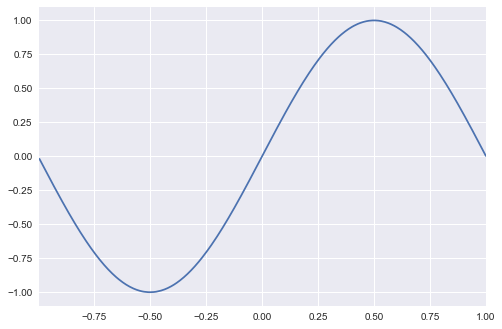

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns

X = np.random.uniform(-1, 1, size=1000)
y = np.sin(np.pi * X)

sns.tsplot(y, X)

But this time we will be using one curve to fit the distribution, a second order one. But we will be varying the amount of regularization we will be using and we will then check out the approximation generalization trade off again:

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model_train_errors = []
model_test_errors = []
model_generalization_error = []
for model_complexity in range(1, 10):
    train_errors = []
    test_errors = []
    generalization_error = []
    for num_points in range(4, 40, 2):
        train_error = 0
        test_error = 0
        for trail in range(100):
            X_train = np.random.uniform(-1, 1, size=num_points)
            y_train = np.sin(np.pi * X_train)
            
            poly = PolynomialFeatures(2)
            X_train = poly.fit_transform(X_train[:, None])

            # this is where the regularization is taking place!
            reg = Ridge(alpha=1./model_complexity, fit_intercept=False)

            reg.fit(X_train, y_train)

            # now we score both hypotheses on the traning data
            preds = reg.predict(X_train)
            train_error += mean_squared_error(preds, y_train)

            X_test = np.random.uniform(-1, 1, size=50)
            y_test = np.sin(np.pi * X_test)

            X_test = poly.fit_transform(X_test[:, None])
            preds = reg.predict(X_test)
            test_error += mean_squared_error(preds, y_test)
            
        train_error /= 100
        test_error /= 100

        train_errors.append(train_error)
        test_errors.append(test_error)
        generalization_error.append(test_error - train_error)
        
    model_train_errors.append(train_errors)
    model_test_errors.append(test_errors)
    model_generalization_error.append(generalization_error)

NameError: name 'np' is not defined

Now before you look below, what should you expect? We are going to be looking at three quantities: train error, test error, and generalization error. Remember while train error and generalization error are interesting, test error is really what we are looking for. Okay, let's look at the results.

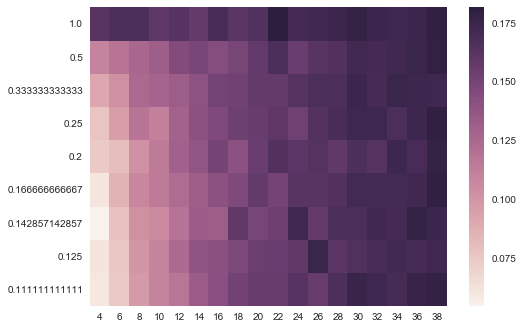

In [15]:
sns.heatmap(model_train_errors,
           xticklabels=range(4, 40, 2),
           yticklabels=[1.0/i for i in range(1, 10)])

Okay we see above the regularization on the y axis and the number of data points on the x axis. Notice that as the number of data points increases, so does the training error. Notice that as the model becomes simpler, the training error increases. It can't fit the training data as well.

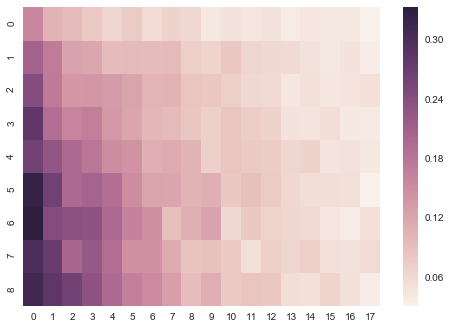

In [13]:
sns.heatmap(model_generalization_error)

But when we look at the generalization error we get the exact opposite trend. As we get more data points we decrease the generalization error. This is because we have a tighter bound. But as we have a simpler model we also decrease the generalization error. Again this is because we have a tighter bound. 

The other way to look at it is that the simpler model can't as easily fit to noise, and as we have more data points that noise is drowned out by signal.

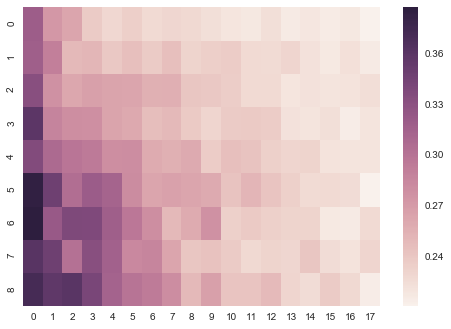

In [14]:
sns.heatmap(model_test_errors)

Finally with the test error we get the sweet spots. The most complex models still don't do as well as the simpler models even though their training error is less. This is because the generalization error is too big.

## Conclusion

Regularization is a way to tune the model complexity to hit the sweet spot for your data's noise level and data points. It allows you to tune a couple of parameters to adjust your model's complexity instead of having to completely rethink your model. 

The question you might be having is: how do we tune this parameter? As you saw above we used the test data to find the best regularization parameter, but this is in reality a big no no. Next time we will find out how we do this in practice.